In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


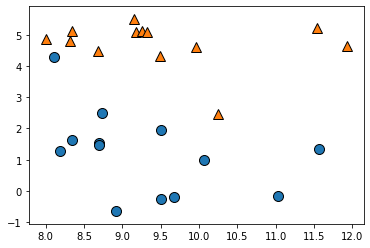

In [2]:
X_f, y_f = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X_f[:,0],X_f[:,1],y_f)

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


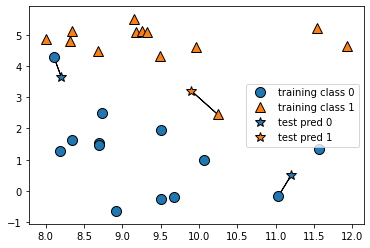

In [3]:
# forge 데이터셋에 대해 K=1 최근접 이웃 모델
mglearn.plots.plot_knn_classification(n_neighbors = 1)

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


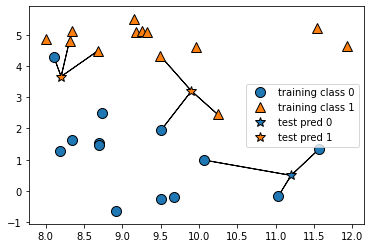

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [5]:
# 데이터 생성
X_f,y_f = mglearn.datasets.make_forge()

# 훈련, 검증 셋 나누기
X_f_train,X_f_test,y_f_train,y_f_test = train_test_split(X_f,y_f,random_state=0)

# 확인
X_f_train,X_f_test,y_f_train,y_f_test


C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 8.92229526, -0.63993225],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [ 7.99815287,  4.8525051 ],
        [11.0329545 , -0.16816717],
        [ 9.17748385,  5.09283177],
        [11.563957  ,  1.3389402 ],
        [ 9.15072323,  5.49832246],
        [ 8.34810316,  5.13415623],
        [11.93027136,  4.64866327],
        [ 8.1062269 ,  4.28695977],
        [ 8.67494727,  4.47573059],
        [ 9.67284681, -0.20283165],
        [ 9.50169345,  1.93824624],
        [ 8.69289001,  1.54322016],
        [ 9.96346605,  4.59676542],
        [ 9.50048972, -0.26430318],
        [ 9.25694192,  5.13284858],
        [ 8.68937095,  1.48709629]]),
 array([[11.54155807,  5.21116083],
        [10.06393839,  0.99078055],
        [ 9.49123469,  4.33224792],
        [ 8.18378052,  1.29564214],
        [ 8.30988863,  4.80623966],
        [10.24028948,  2.45544401],
        [ 8.34468785,  1.63824349]]),
 array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1

In [6]:
# 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 모델 학습, KNN이 테스트셋을 분류할 때 이웃을 찾을 수 있도록 데이터를 저장
knn_clf.fit(X_f_train, y_f_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
print(knn_clf.predict(X_f_test))

[1 0 1 0 1 0 0]


In [8]:
print(knn_clf.score(X_f_test,y_f_test))

0.8571428571428571


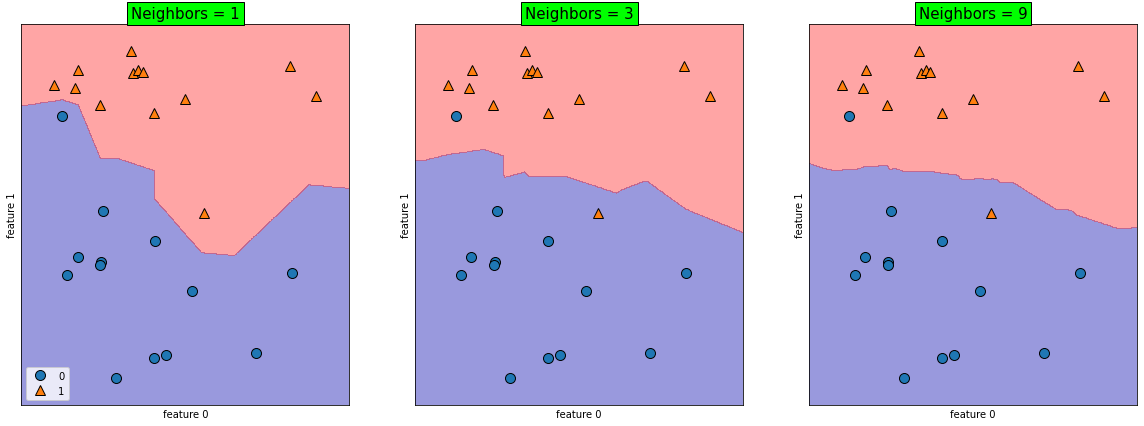

In [12]:
fig,axes = plt.subplots(1,3,figsize=(20,7))
for NN,ax in zip([1,3,9],axes):
    # KNN 모델 생성
    clf = KNeighborsClassifier(n_neighbors = NN).fit(X_f,y_f)
    
    # KNN 결정 경계
    mglearn.plots.plot_2d_separator(clf,X_f,fill= True,eps=0.5,ax=ax,alpha=0.4)
    
    # 산점도
    mglearn.discrete_scatter(X_f[:,0],X_f[:,1],y_f,ax=ax)
    ax.set_title("Neighbors = {}".format(NN), bbox=dict(facecolor='lime'), fontdict={'size':15})
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)




In [18]:
# 데이터 생성
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
X_c, y_c = make_circles(n_samples=100, factor=0.3, noise=0.25, random_state=0)
X_m, y_m = make_moons(n_samples=100, noise=0.25, random_state=0)

from sklearn.datasets import make_classification
X_clf, y_clf = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X_clf += 2 * rng.uniform(size=X_clf.shape)

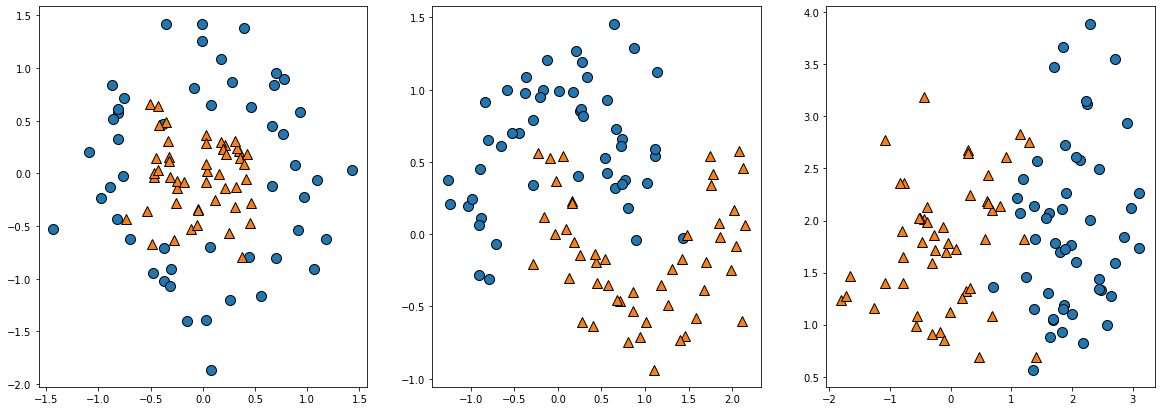

In [22]:
fig,axes = plt.subplots(1,3,figsize = (20,7))
mglearn.discrete_scatter(X_c[:,0],X_c[:,1],y_c,ax=axes[0])
mglearn.discrete_scatter(X_m[:,0],X_m[:,1],y_m,ax=axes[1])
mglearn.discrete_scatter(X_clf[:,0],X_clf[:,1],y_clf,ax=axes[2])

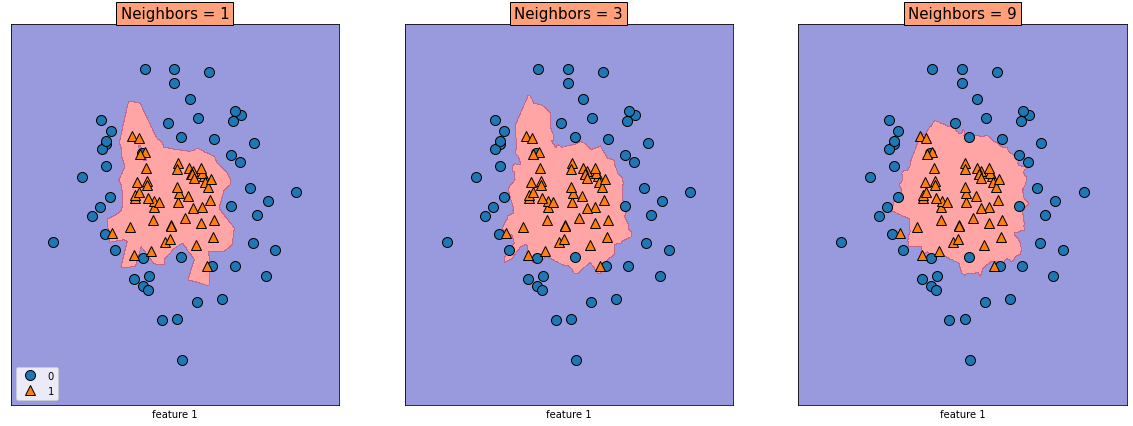

In [24]:
fig,axes = plt.subplots(1,3,figsize=(20,7))
for n_neighbors ,ax in zip([1,3,9],axes):
    clf_m = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_c,y_c)
    mglearn.plots.plot_2d_separator(clf_m,X_c,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X_c[:,0],X_c[:,1],y_c,ax=ax)
    ax.set_title("Neighbors = {}".format(n_neighbors),bbox = dict(facecolor='lightsalmon'),fontdict={'size':15})
    ax.set_xlabel('feature 0')
    ax.set_xlabel('feature 1')
axes[0].legend(loc=3)    

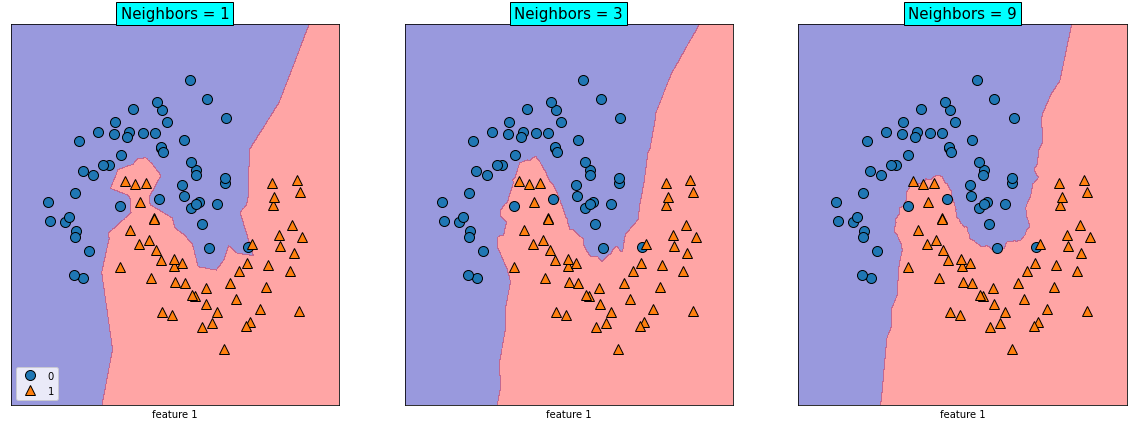

In [26]:
fig,axes = plt.subplots(1,3,figsize=(20,7))
for n_neighbors ,ax in zip([1,3,9],axes):
    clf_m = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_m,y_m)
    mglearn.plots.plot_2d_separator(clf_m,X_m,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X_m[:,0],X_m[:,1],y_m,ax=ax)
    ax.set_title("Neighbors = {}".format(n_neighbors),bbox = dict(facecolor='aqua'),fontdict={'size':15})
    ax.set_xlabel('feature 0')
    ax.set_xlabel('feature 1')
axes[0].legend(loc=3)    

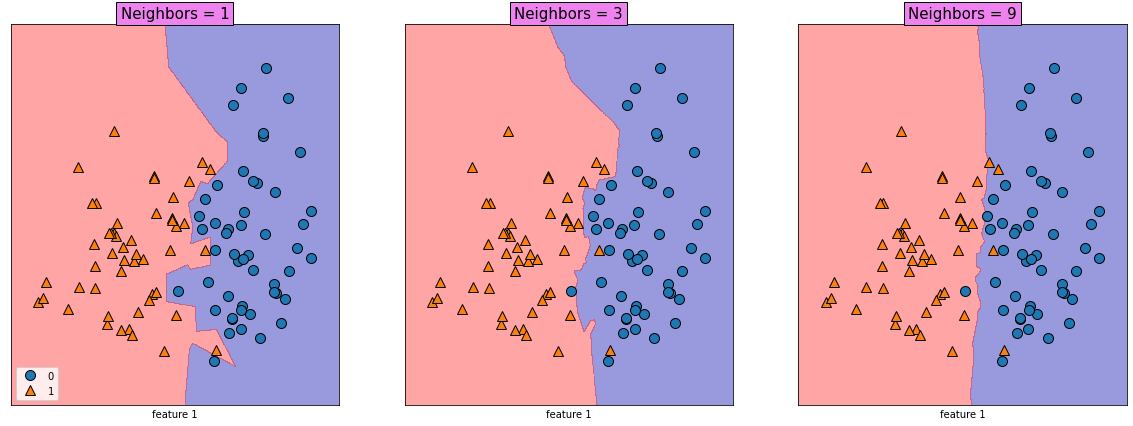

In [27]:
fig,axes = plt.subplots(1,3,figsize=(20,7))
for n_neighbors ,ax in zip([1,3,9],axes):
    clf_clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_clf,y_clf)
    mglearn.plots.plot_2d_separator(clf_clf,X_clf,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X_clf[:,0],X_clf[:,1],y_clf,ax=ax)
    ax.set_title("Neighbors = {}".format(n_neighbors),bbox = dict(facecolor='violet'),fontdict={'size':15})
    ax.set_xlabel('feature 0')
    ax.set_xlabel('feature 1')
axes[0].legend(loc=3)    

In [29]:
from sklearn.datasets import load_breast_cancer

# 데이터 임포트
cancer = load_breast_cancer()

# train,test 분할
X_train,X_test,y_train,y_test = train_test_split(
        cancer.data,cancer.target, stratify=cancer.target,random_state = 66)

# n_neighbors에 따른 정확도를 넣을 array 준비

training_accuracy = []
test_accuracy = []

# 1에서 10 까지 n_neighbors를 적용

neighbors_setting = range(1,11)

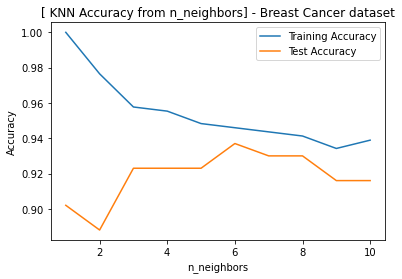

In [30]:
for n_neighbors in neighbors_setting:
    # 모델생성
    clf_cancer = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf_cancer.fit(X_train,y_train)
    
    # 훈련 셋 정확도 저장
    training_accuracy.append(clf_cancer.score(X_train,y_train))
    
    # 테스트셋 정확도 저장
    test_accuracy.append(clf_cancer.score(X_test,y_test))

plt.title("[ KNN Accuracy from n_neighbors] - Breast Cancer dataset")
plt.plot(neighbors_setting, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_setting, test_accuracy,label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()